In [1]:
#importing dependencies
import warnings
warnings.filterwarnings('ignore')
import tensorflow 

2023-02-10 10:46:32.139227: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-10 10:46:32.329573: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-10 10:46:32.329596: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-10 10:46:33.098987: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale = 1./255)

In [3]:
# train dataset
train_data = train_gen.flow_from_directory('/home/ubuntu/Downloads/sep_data_final/sep_data/train',target_size=(224,224),
                                           batch_size=32,class_mode='categorical',shuffle=True)

Found 5440 images belonging to 36 classes.


In [4]:
#validation dataset
val_data = train_gen.flow_from_directory('/home/ubuntu/Downloads/sep_data_final/sep_data/val',target_size=(224,224),
                                         batch_size=32,class_mode='categorical',shuffle=False)

Found 2050 images belonging to 36 classes.


In [5]:
#classes for train data
train_data.class_indices

{'class_0': 0,
 'class_1': 1,
 'class_2': 2,
 'class_3': 3,
 'class_4': 4,
 'class_5': 5,
 'class_6': 6,
 'class_7': 7,
 'class_8': 8,
 'class_9': 9,
 'class_A': 10,
 'class_B': 11,
 'class_C': 12,
 'class_D': 13,
 'class_E': 14,
 'class_F': 15,
 'class_G': 16,
 'class_H': 17,
 'class_I': 18,
 'class_J': 19,
 'class_K': 20,
 'class_L': 21,
 'class_M': 22,
 'class_N': 23,
 'class_O': 24,
 'class_P': 25,
 'class_Q': 26,
 'class_R': 27,
 'class_S': 28,
 'class_T': 29,
 'class_U': 30,
 'class_V': 31,
 'class_W': 32,
 'class_X': 33,
 'class_Y': 34,
 'class_Z': 35}

In [6]:
train_data.classes

array([ 0,  0,  0, ..., 35, 35, 35], dtype=int32)

# Model creation

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization

In [8]:
res_net=tensorflow.keras.applications.ResNet50V2(weights="imagenet",input_shape=(224,224,3),include_top=False)

#freezimg weights and bias
res_net.trainable=False

2023-02-10 10:46:34.390767: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-10 10:46:34.390809: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-10 10:46:34.390840: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ubuntu-Zako): /proc/driver/nvidia/version does not exist
2023-02-10 10:46:34.391139: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# build architecture
model = Sequential()
model.add(res_net)
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(units=64,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(units=32,activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(units = 36,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               12845184  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                        

In [11]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

In [12]:
#import callback for avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping

es=EarlyStopping(monitor="accuracy",patience=3)

In [13]:
model.fit(train_data,validation_data = val_data,epochs=10,callbacks=[es])

Epoch 1/10
170/170 [==============================] - 749s 4s/step - loss: 1.5934 - accuracy: 0.6202 - val_loss: 0.7498 - val_accuracy: 0.8322
Epoch 2/10
170/170 [==============================] - 714s 4s/step - loss: 0.5233 - accuracy: 0.8838 - val_loss: 0.2968 - val_accuracy: 0.9385
Epoch 3/10
170/170 [==============================] - 711s 4s/step - loss: 0.2422 - accuracy: 0.9445 - val_loss: 0.2507 - val_accuracy: 0.9395
Epoch 4/10
170/170 [==============================] - 708s 4s/step - loss: 0.1619 - accuracy: 0.9599 - val_loss: 0.2553 - val_accuracy: 0.9478
Epoch 5/10
170/170 [==============================] - 700s 4s/step - loss: 0.1261 - accuracy: 0.9699 - val_loss: 0.2600 - val_accuracy: 0.9463
Epoch 6/10
170/170 [==============================] - 701s 4s/step - loss: 0.0931 - accuracy: 0.9779 - val_loss: 0.2696 - val_accuracy: 0.9498
Epoch 7/10
170/170 [==============================] - 699s 4s/step - loss: 0.0681 - accuracy: 0.9849 - val_loss: 0.2466 - val_accuracy: 0.9537

In [14]:
#save the model
model.save('model.h5')

In [15]:
from sklearn.metrics import classification_report,accuracy_score

In [16]:
import numpy as np

In [17]:
y_pred=model.predict(val_data)
y_pred[0:2]

65/65 [==============================] - 187s 3s/step


array([[9.9998945e-01, 1.0014627e-08, 3.8453504e-13, 1.7795688e-15,
        1.0432227e-09, 2.9610733e-10, 9.0528331e-12, 1.1510885e-11,
        1.9487151e-08, 5.6381460e-09, 5.8196945e-09, 5.5015882e-08,
        1.5148767e-07, 3.8654449e-07, 2.3587832e-07, 3.8070205e-10,
        5.7217285e-08, 1.8151926e-09, 1.7832268e-13, 8.5653307e-12,
        9.1084594e-13, 1.0386006e-13, 1.3523860e-09, 4.9522958e-10,
        4.9568581e-07, 1.8354305e-07, 4.0326172e-06, 7.0125811e-10,
        3.0580673e-12, 6.2245472e-13, 3.5854118e-06, 3.5054633e-08,
        1.2904590e-06, 1.5155420e-10, 7.5414813e-12, 1.9438515e-12],
       [9.8828101e-01, 2.1242563e-06, 6.2947253e-10, 1.1141658e-11,
        3.1692011e-08, 1.5078568e-08, 9.7937825e-10, 6.6584761e-07,
        3.2100315e-06, 7.2483943e-09, 1.5438275e-07, 9.7030279e-06,
        2.4809589e-07, 2.4168221e-05, 4.2666688e-06, 2.1062512e-07,
        6.6941915e-08, 1.7059700e-06, 2.7634235e-09, 7.8786302e-09,
        1.2995458e-09, 4.3883286e-10, 7.1155605

In [18]:
y_pred1=np.argmax(y_pred,axis=1)
y_pred1

array([ 0,  0,  0, ..., 35, 35, 35])

In [19]:
val_data.classes

array([ 0,  0,  0, ..., 35, 35, 35], dtype=int32)

In [20]:
print(classification_report(val_data.classes,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       144
           1       0.90      0.95      0.92       102
           2       0.99      0.96      0.97        78
           3       0.99      1.00      0.99        75
           4       0.96      0.96      0.96        78
           5       0.99      0.94      0.96        78
           6       0.94      0.98      0.96        61
           7       0.96      0.95      0.95       112
           8       0.95      0.93      0.94        95
           9       0.97      0.99      0.98       103
          10       0.92      0.94      0.93        47
          11       0.84      0.89      0.86        35
          12       1.00      0.96      0.98        53
          13       0.93      0.82      0.87        33
          14       0.96      1.00      0.98        54
          15       1.00      0.98      0.99        53
          16       1.00      0.97      0.99        34
          17       0.97    

In [21]:
accuracy_score(val_data.classes,y_pred1)

0.9546341463414634

In [22]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [23]:
name=[0,1,2,3,4,5,6,7,8,9,'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

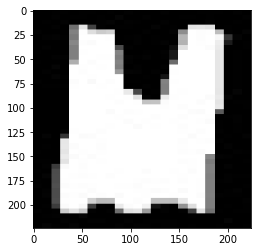

In [156]:
img=load_img('/home/ubuntu/Downloads/gen_data/char_165_669363_1674665246607_2.jpg',target_size=(224,224,3))
plt.imshow(img)

In [157]:
img=img_to_array(img)
img=np.expand_dims(img,axis=0)
img=img/255

In [158]:
predict=model.predict(img)
print(predict)

1/1 [==============================] - 0s 147ms/step
[[1.18637597e-02 7.17618270e-04 8.96259166e-07 3.75315062e-06
  7.82645307e-04 1.07286442e-05 7.54562570e-05 1.16534604e-04
  1.36528574e-02 9.03112086e-05 7.64855929e-03 1.66980140e-02
  1.82621102e-06 8.45762959e-04 7.19865420e-06 4.57053357e-05
  3.75155810e-06 4.02546395e-03 2.58032931e-04 4.90708975e-04
  1.24812161e-03 4.68129292e-04 8.35347354e-01 2.07307306e-03
  3.81200880e-05 4.65750694e-03 8.47857373e-05 4.85271739e-05
  5.80591268e-06 1.42361922e-03 4.69942670e-03 9.91213135e-04
  9.10749510e-02 5.76153543e-05 4.07565414e-04 3.46113884e-05]]


In [159]:
np.round(predict,2)

array([[0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01,
        0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.84, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.09,
        0.  , 0.  , 0.  ]], dtype=float32)

In [160]:
np.argmax(predict)

22

In [161]:
name[np.argmax(predict)]

'M'